References
----------
[1] https://openstax.org/books/calculus-volume-1/pages/3-6-the-chain-rule
    
[2] Checkpoint 3.39
$$
\begin{equation}
s(t)=sin(4t)
\end{equation}
$$

SymPy version: 1.13.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2

Lambda(x, sin(4*x))
x:[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]
y:[-0.912945250727628, 0.750987246771676, 0.287903316665065, -0.990607355694870, 0.536572918000435, 0.544021110889370, -0.989358246623382, 0.279415498198926, 0.756802495307928, -0.909297426825682, 0, 0.909297426825682, -0.756802495307928, -0.279415498198926, 0.989358246623382, -0.544021110889370, -0.536572918000435, 0.990607355694870, -0.287903316665065, -0.750987246771676, 0.912945250727628]
f′(x)=4*cos(4*x)
f′′(x)=-16*sin(4*x)
f′′(2)=-0.582000135234454
y_tangent:[5.06335919326456 4.77235912564733 4.48135905803011 4.19035899041288
 3.89935892279565 3.60835885517843 3.31735878756120 3.02635871994397
 2.73535865232674 2.44435858470952 2.15335851709229 1.86235844947506
 1.57135838185784 1.28035831424061 0.989358246623382 0.698358179006155
 0.407358111388928 0.116358043771701 -0.174642023845

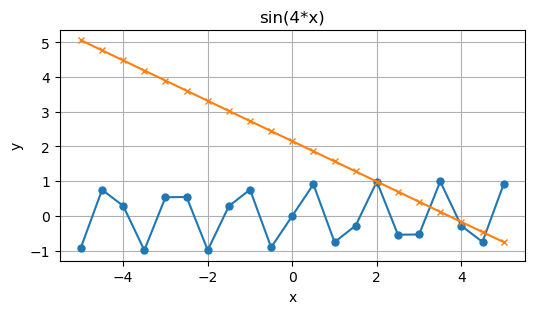

In [11]:
import sympy as sp
from sympy.abc import x
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

print(f"SymPy version: {sp.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print()

f = sp.Lambda(x, sp.sin(4 * x))
print(f)

x_values = np.linspace(-5, 5, 21)
print(f"x:{x_values}")


def map_x_values(x_value):
    result = f(x_value)
    if result == sp.zoo:
        return np.inf
    return result


y_values = list(map(map_x_values, x_values))
print(f"y:{y_values}")

f_prime = sp.diff(f(x), x)
print(f"f′(x)={f_prime}")
f_diff2 = sp.diff(f_prime, x)
print(f"f′′(x)={f_diff2}")

x_at = 2


def calculate_slope(derivative_fn, derivative_order=1):
    slope = derivative_fn.subs(x, x_at).evalf()
    apostrophe = "′" * derivative_order
    print(f"f{apostrophe}({x_at})={slope}")
    y_tangent = slope * (x_values - x_at) + f(x_at).evalf()
    print(f"y_tangent:{y_tangent}")
    return slope, y_tangent


slope, y_tangent = calculate_slope(f_prime, 2)

figure, axes = plt.subplots(figsize=(6, 3))
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title(f.expr)
axes.grid()
axes.plot(x_values, y_values, marker="o", markersize=5, label="f′")
axes.plot(x_values, y_tangent, marker="x", markersize=5, label="f′′")
plt.show()